In part spine_1, the most frequent motif is ((-3, 'descending'), (-3, 'descending'), (3, 'ascending'), (-5, 'descending')) and it appears 18 times.
The second most frequent motif is ((-3, 'descending'), (3, 'ascending'), (-5, 'descending'), (3, 'ascending')) and it appears 10 times.
In part spine_0, the most frequent motif is ((-3, 'descending'), (3, 'ascending'), (-5, 'descending'), (3, 'ascending')) and it appears 8 times.
The second most frequent motif is ((4, 'ascending'), (3, 'ascending'), (-2, 'descending'), (-5, 'descending')) and it appears 5 times.


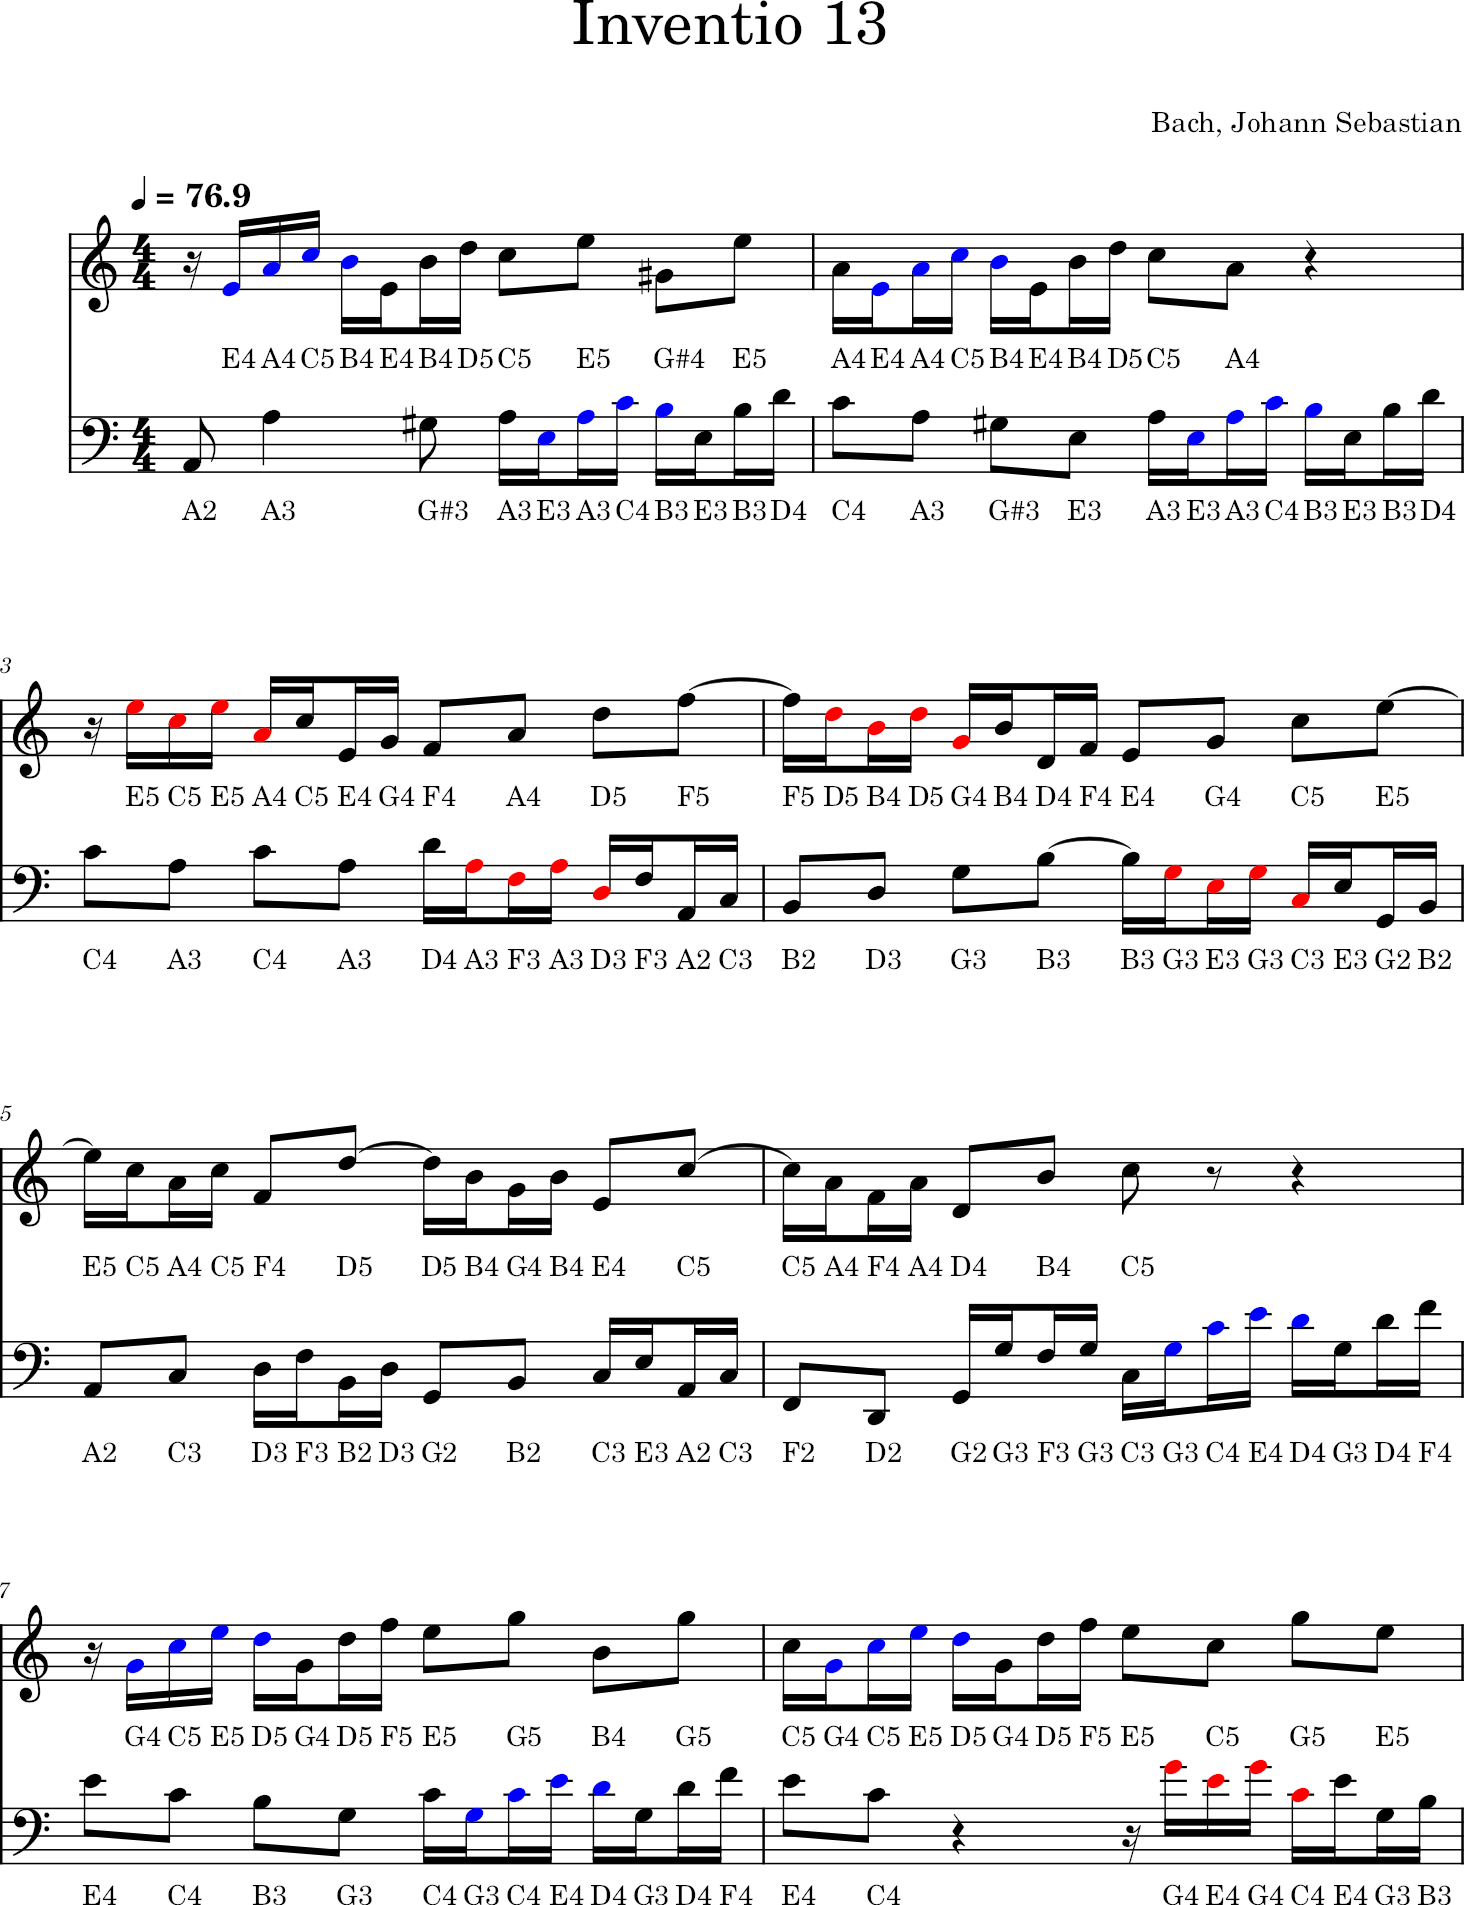

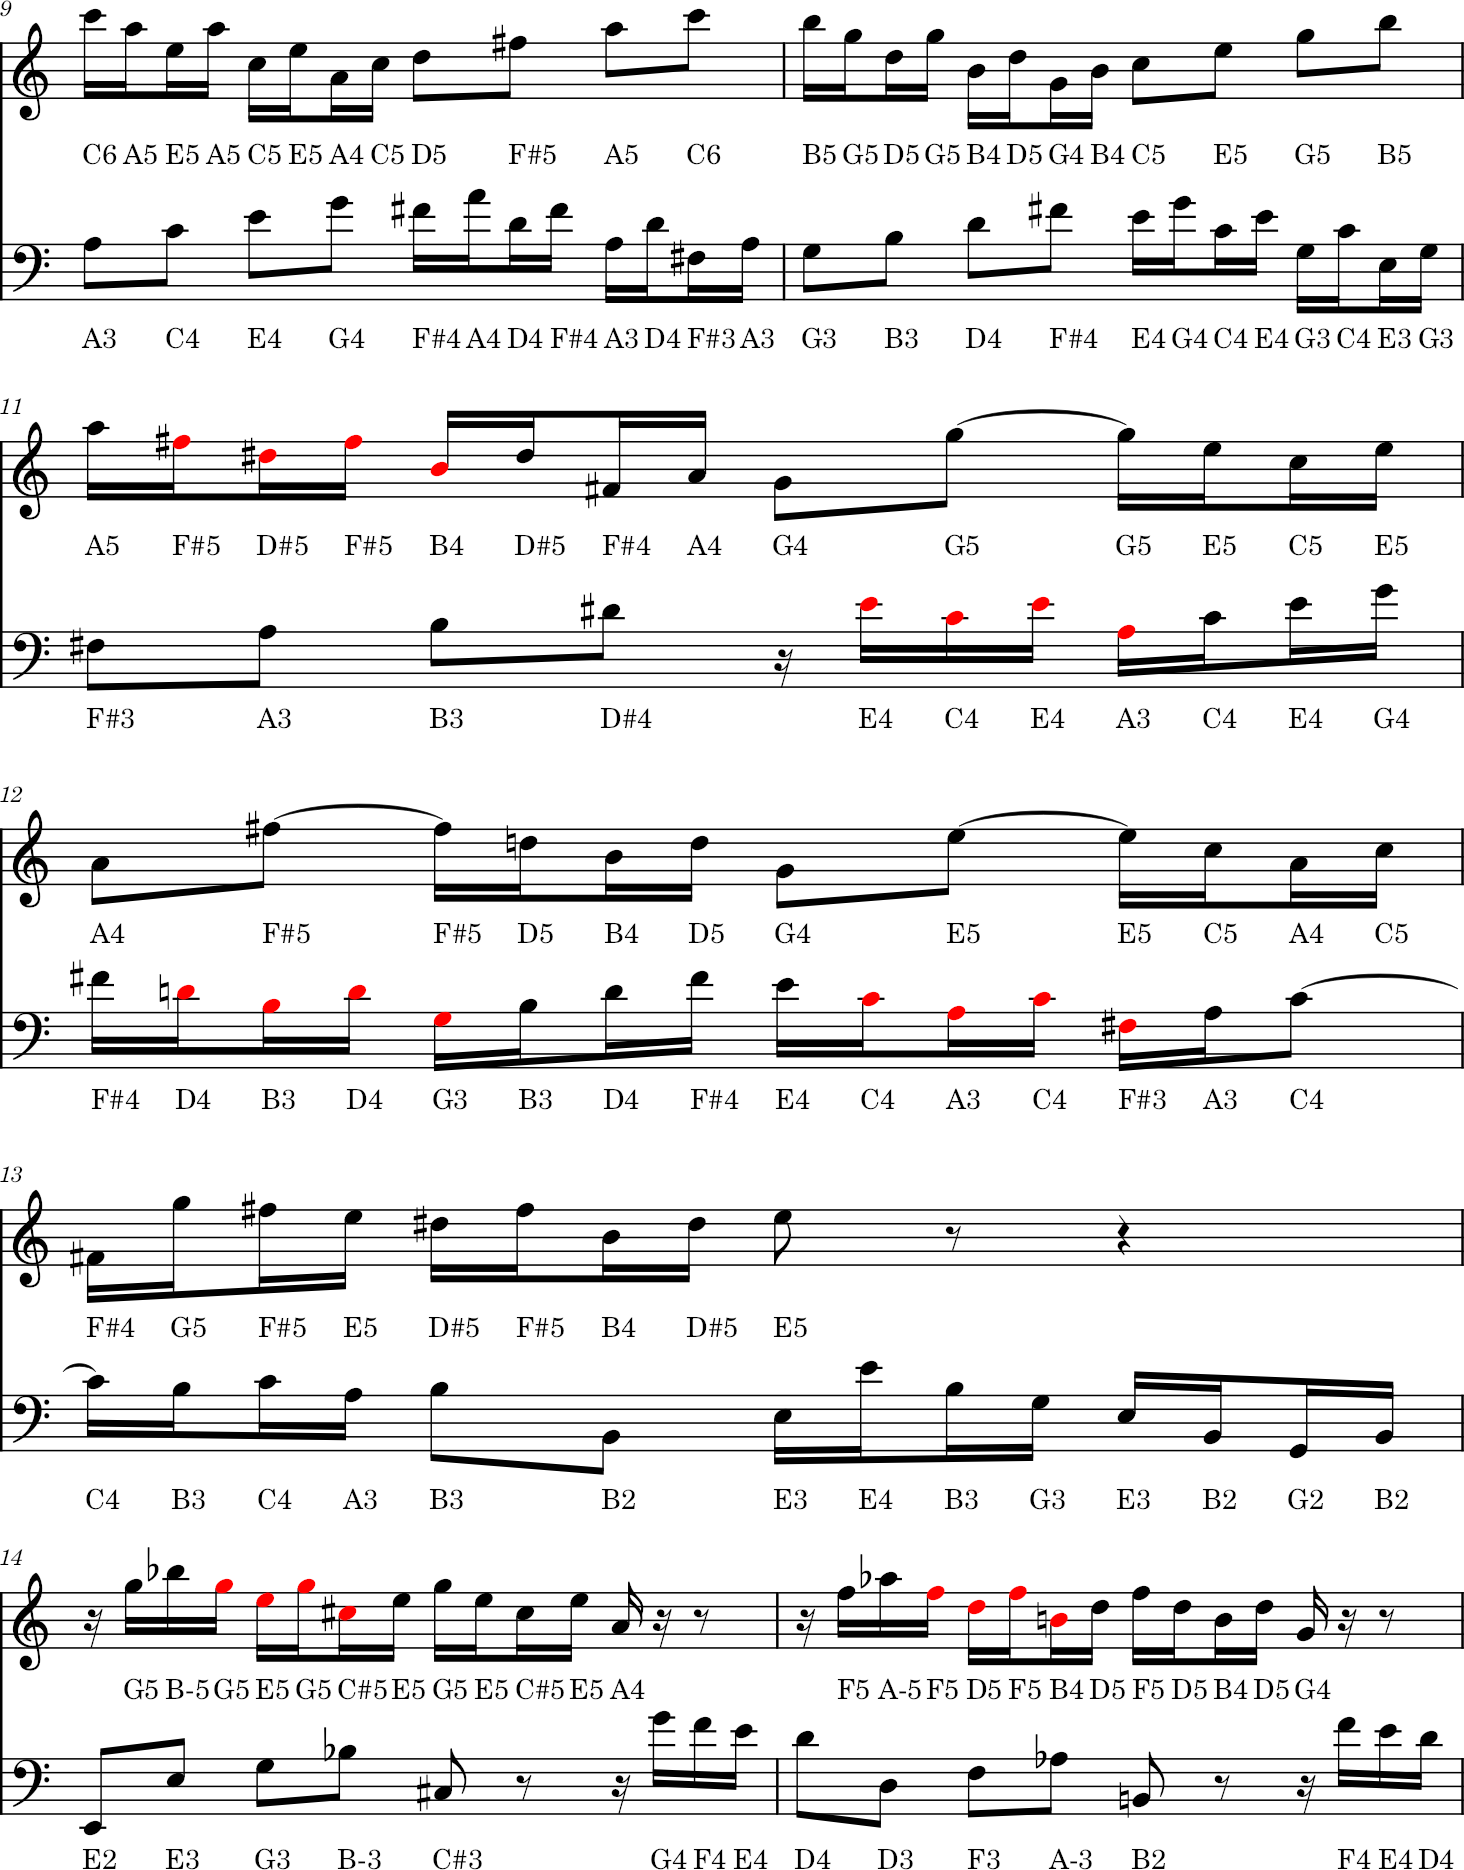

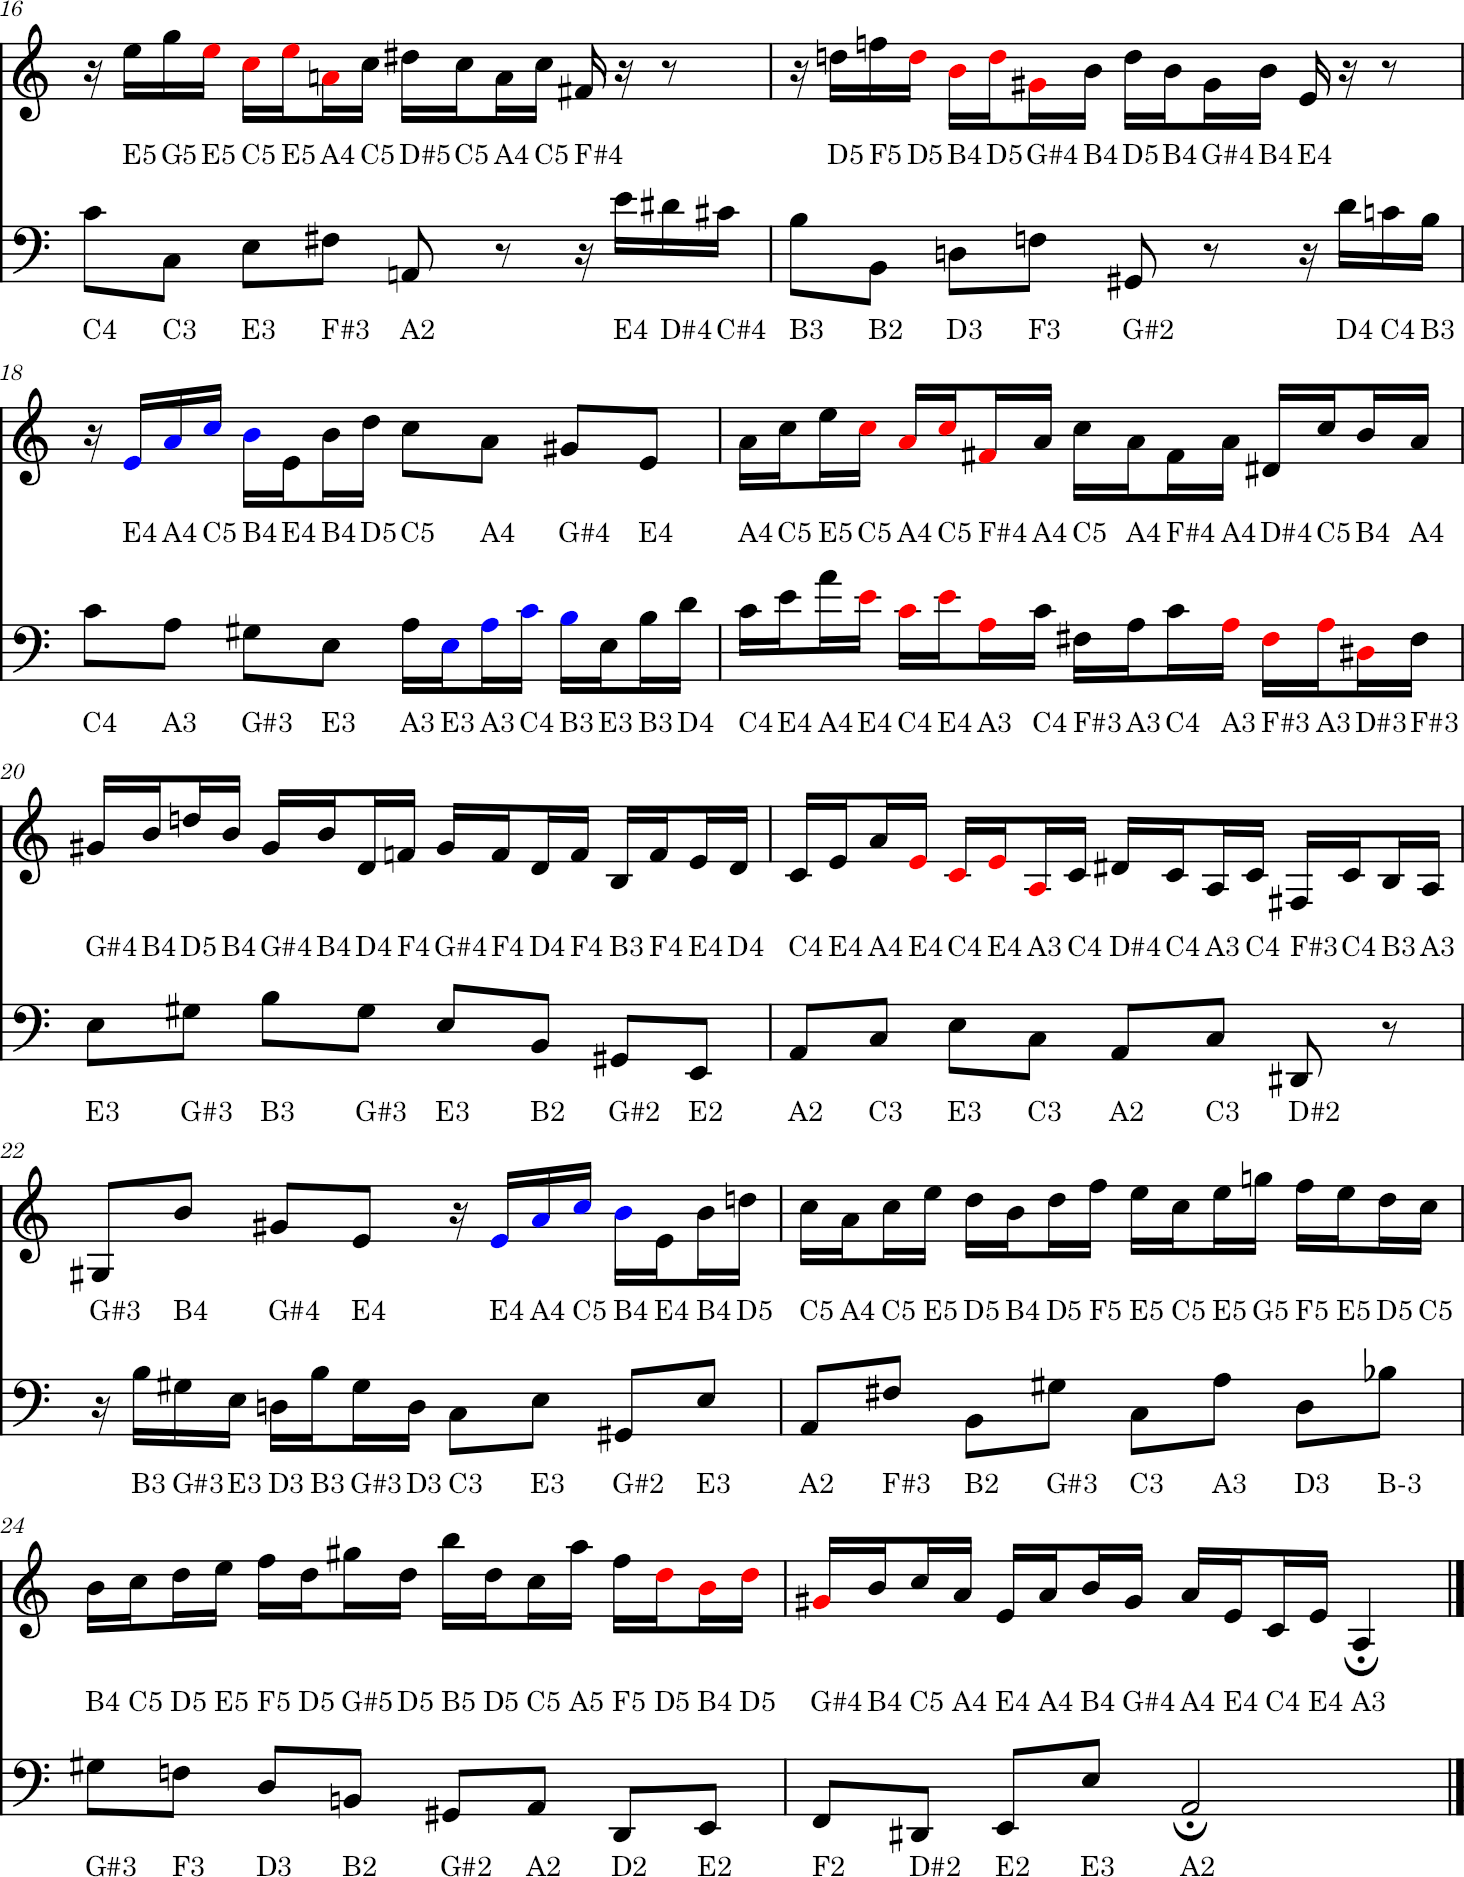

The pattern [(-3, 'descending'), (3, 'ascending'), (-5, 'descending'), (3, 'ascending')] repeats 10 times in the soprano part.
The pattern [(-3, 'descending'), (3, 'ascending'), (-5, 'descending'), (3, 'ascending')] repeats 8 times in the bass voice part.
The pattern [(4, 'ascending'), (3, 'ascending'), (-2, 'descending'), (-5, 'descending')] repeats 6 times in the soprano part.
The pattern [(4, 'ascending'), (3, 'ascending'), (-2, 'descending'), (-5, 'descending')] repeats 5 times in the bass voice part.


In [14]:
from music21 import interval, converter, note, chord

# Load the piece
piece_name = 'inven13.krn' 
score = converter.parse(piece_name)
piece = converter.parse(piece_name)
soprano_part = score.parts[0] 
bass_part = score.parts[1] 

# Function to generate all n-note motifs for a given part
def generate_motifs(part,motif_length):
    motifs = []
    notes = [n for n in part.flat.notes]
    for i in range(len(notes) - motif_length - 1 ): 
        motif = notes[i:i+motif_length]
        motifs.append(motif)
    return motifs

# Function to calculate intervals for a motif
def calculate_motif_intervals(motif):
    intervals_and_directions = []
    for i in range(len(motif) - 1):
        interval_obj = interval.Interval(motif[i], motif[i+1])
        direction = 'ascending' if interval_obj.direction == 1 else 'descending'
        interval_value = interval_obj.generic.directed
        intervals_and_directions.append((interval_value, direction))
    return intervals_and_directions

# Iterate over each part separately
for part in piece.parts:
    # Here you set the length of the motif to check for
    # Generate all possible n-note motifs for the current part
    motifs = generate_motifs(part, 5)

    # Calculate intervals for each motif and count occurrences
    motif_counts = {}
    for motif in motifs:
        motif_intervals = calculate_motif_intervals(motif)
        motif_tuple = tuple(motif_intervals)
        if motif_tuple not in motif_counts:
            motif_counts[motif_tuple] = 1
        else:
            motif_counts[motif_tuple] += 1

    # Sort motifs by their counts and select the top two
    sorted_motifs = sorted(motif_counts.items(), key=lambda x: x[1], reverse=True)
    most_frequent_motif, most_frequent_count = sorted_motifs[0]
    second_most_frequent_motif, second_most_frequent_count = sorted_motifs[1]

    print(f"In part {part.id}, the most frequent motif is {most_frequent_motif} and it appears {most_frequent_count} times.")
    print(f"The second most frequent motif is {second_most_frequent_motif} and it appears {second_most_frequent_count} times.")

    # Search for the most frequent motif in the current part
    for motif in motifs:
        motif_intervals = calculate_motif_intervals(motif)
        if motif_intervals == most_frequent_motif:
            print(f"The most frequent motif {most_frequent_motif} is found in the motif {motif} in part {part.id}.")

# Function to highlight the pattern in a specified color for a given part
def highlight_pattern_in_part(part, pattern, color):
    notes = [n for n in part.flat.notes]
    intervals_and_directions = []
    for i in range(len(notes) - 1):
        interval_obj = interval.Interval(notes[i], notes[i+1])
        direction = 'ascending' if interval_obj.direction == 1 else 'descending'
        interval_value = interval_obj.generic.directed
        intervals_and_directions.append((interval_value, direction))

    pattern_count = 0
    for i in range(len(intervals_and_directions) - len(pattern) + 1):
        if intervals_and_directions[i:i+len(pattern)] == pattern:
            pattern_count += 1
            # Highlight the notes in the pattern in the specified color
            for j in range(len(pattern)):
                notes[i+j].style.color = color
    return pattern_count

def notes_to_score(score):
    for elem in score.recurse():
        if isinstance(elem, note.Note):
            # For single notes, annotate with the note name and octave
            elem.lyrics.append(note.Lyric(elem.nameWithOctave))
        elif isinstance(elem, chord.Chord):
            # For chords, annotate with each note's name in the chord
            chord_notes = '\n'.join(p.nameWithOctave for p in elem.pitches)
            elem.lyrics.append(note.Lyric(chord_notes))
pattern_first = list(most_frequent_motif)
pattern_second = list(second_most_frequent_motif)

# Highlight the pattern in red for both parts
soprano_pattern_count_first = highlight_pattern_in_part(soprano_part, pattern_first, 'red')
bass_pattern_count_first = highlight_pattern_in_part(bass_part, pattern_first, 'red')

# Highlight the pattern in blue for both parts
soprano_pattern_count_second = highlight_pattern_in_part(soprano_part, pattern_second, 'blue')
bass_pattern_count_second = highlight_pattern_in_part(bass_part, pattern_second, 'blue')

notes_to_score(score)
# Display the score with highlighted notes
score.show()

print(f"The pattern {pattern_first} repeats {soprano_pattern_count_first} times in the soprano part.")
print(f"The pattern {pattern_first} repeats {bass_pattern_count_first} times in the bass voice part.")
print(f"The pattern {pattern_second} repeats {soprano_pattern_count_second} times in the soprano part.")
print(f"The pattern {pattern_second} repeats {bass_pattern_count_second} times in the bass voice part.")